# Домашнее задание по теме: пакет `matplotlib`

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

!pip -V

pip 20.3.3 from /home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/pip (python 3.8)


In [2]:
# !conda install numpy pandas matplotlib -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [6]:
# загрузить датасет в pandas dataframe
df = pd.read_csv("./../../data/hotel_bookings.csv")

# показать все колонки
pd.options.display.max_columns = None

# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Подготовка данных

In [7]:
df['stays_nights'] = df.stays_in_week_nights + df.stays_in_weekend_nights

In [8]:
df_groupby_lead_time = df.groupby('lead_time').mean()
df_groupby_lead_time

,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,stays_nights
lead_time,,,,,,,,,,,,,,,,,,,,
0,0.067770,2016.049961,25.269819,15.699291,0.390229,1.168794,1.623956,0.071080,0.007407,0.180930,0.038928,0.541056,0.254058,117.866923,154.229829,0.000000,83.253828,0.129866,0.349724,1.559023
1,0.092775,2016.091908,24.222254,15.423988,0.405202,1.434393,1.622543,0.093407,0.013584,0.112428,0.061850,0.531792,0.208092,119.400086,152.945233,0.000289,89.909876,0.152023,0.608382,1.839595
2,0.102948,2016.127115,24.745288,15.855002,0.503625,1.526341,1.654422,0.095745,0.008700,0.107298,0.055099,0.564524,0.208313,119.919051,166.076023,0.000000,93.989275,0.145964,0.638956,2.029966
3,0.100220,2016.079295,25.106828,15.515419,0.745044,1.616189,1.630507,0.101322,0.012115,0.101872,0.052863,0.683921,0.203194,114.292607,150.163462,0.000000,92.832302,0.142070,0.648678,2.361233
4,0.102624,2016.124781,24.327114,15.845481,0.685714,1.652478,1.627405,0.116618,0.009913,0.108455,0.076968,0.744023,0.199417,101.746753,152.852090,0.001166,94.844729,0.115452,0.664140,2.338192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1.000000,2017.000000,12.000000,23.000000,0.000000,1.882353,1.882353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,61.647059,0.000000,0.000000,1.882353
626,1.000000,2016.000000,46.000000,7.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,62.800000,0.000000,0.000000,3.000000
629,1.000000,2017.000000,13.000000,30.000000,0.000000,1.882353,1.882353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,61.647059,0.000000,0.000000,1.882353


In [9]:
stays_nights_lead_time = df_groupby_lead_time.stays_nights
stays_nights_lead_time

lead_time
0       1.559023
1       1.839595
2       2.029966
3       2.361233
4       2.338192
         ...    
622     1.882353
626     3.000000
629     1.882353
709    28.000000
737     0.000000
Name: stays_nights, Length: 479, dtype: float64

In [10]:
stays_in_week_nights_lead_time = df_groupby_lead_time.stays_in_week_nights
stays_in_week_nights_lead_time

lead_time
0       1.168794
1       1.434393
2       1.526341
3       1.616189
4       1.652478
         ...    
622     1.882353
626     2.000000
629     1.882353
709    20.000000
737     0.000000
Name: stays_in_week_nights, Length: 479, dtype: float64

In [11]:
stays_in_weekend_nights_lead_time = df_groupby_lead_time.stays_in_weekend_nights
stays_in_weekend_nights_lead_time

lead_time
0      0.390229
1      0.405202
2      0.503625
3      0.745044
4      0.685714
         ...   
622    0.000000
626    1.000000
629    0.000000
709    8.000000
737    0.000000
Name: stays_in_weekend_nights, Length: 479, dtype: float64

## Графики (line plot)

### `Pyplot`-стиль

Text(0.5, 0, 'lead time')

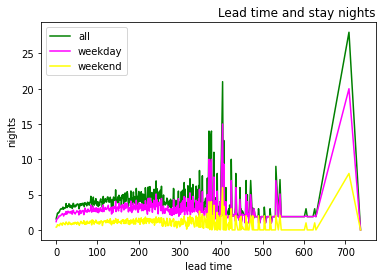

In [12]:
plt.plot(stays_nights_lead_time, 
         color='green', label='all')

plt.plot(stays_in_week_nights_lead_time, 
         color='magenta', label='weekday')

plt.plot(stays_in_weekend_nights_lead_time, 
         color='yellow', label='weekend')


plt.legend(loc='upper left')
plt.title(label='Lead time and stay nights', 
          loc='right')

plt.ylabel('nights')

plt.xlabel('lead time')

### ОО-стиль

Text(0, 0.5, 'nights (weekend)')

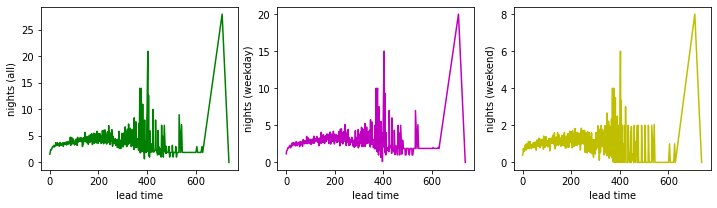

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].plot(stays_nights_lead_time, 'g')
ax[1].plot(stays_in_week_nights_lead_time, 'm')
ax[2].plot(stays_in_weekend_nights_lead_time, 'y')

ax[0].set_xlabel('lead time')
ax[1].set_xlabel('lead time')
ax[2].set_xlabel('lead time')

ax[0].set_ylabel('nights (all)')
ax[1].set_ylabel('nights (weekday)')
ax[2].set_ylabel('nights (weekend)')

## Диаграммы разброса (scatter plot)

### `Pyplot`-стиль

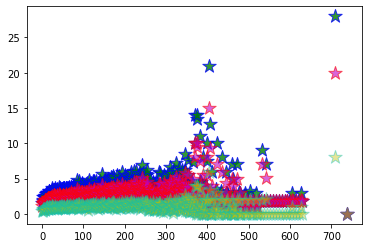

In [14]:
plt.scatter(x=stays_nights_lead_time.index, 
            y=stays_nights_lead_time, 
            marker='*', 
            color='g', 
            alpha=0.8, 
            edgecolors='b', 
            s=200, 
            label='all')

plt.scatter(x=stays_in_week_nights_lead_time.index, 
            y=stays_in_week_nights_lead_time, 
            marker='*', 
            color='m', 
            alpha=0.6, 
            edgecolors='r', 
            s=200,
            label='weekday')

plt.scatter(x=stays_in_weekend_nights_lead_time.index, 
            y=stays_in_weekend_nights_lead_time, 
            marker='*', 
            color='y', 
            alpha=0.4, 
            edgecolors='c', 
            s=200,
            label='weekend')

### ОО-стиль

## 

### `Pyplot`-стиль

### ОО-стиль

## 

### `Pyplot`-стиль

### ОО-стиль

## 

### `Pyplot`-стиль

### ОО-стиль

## 

### `Pyplot`-стиль

### ОО-стиль

## 

### `Pyplot`-стиль

### ОО-стиль

## 

### `Pyplot`-стиль

### ОО-стиль

## 

### `Pyplot`-стиль

### ОО-стиль

## 

### `Pyplot`-стиль

### ОО-стиль